In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Part A:

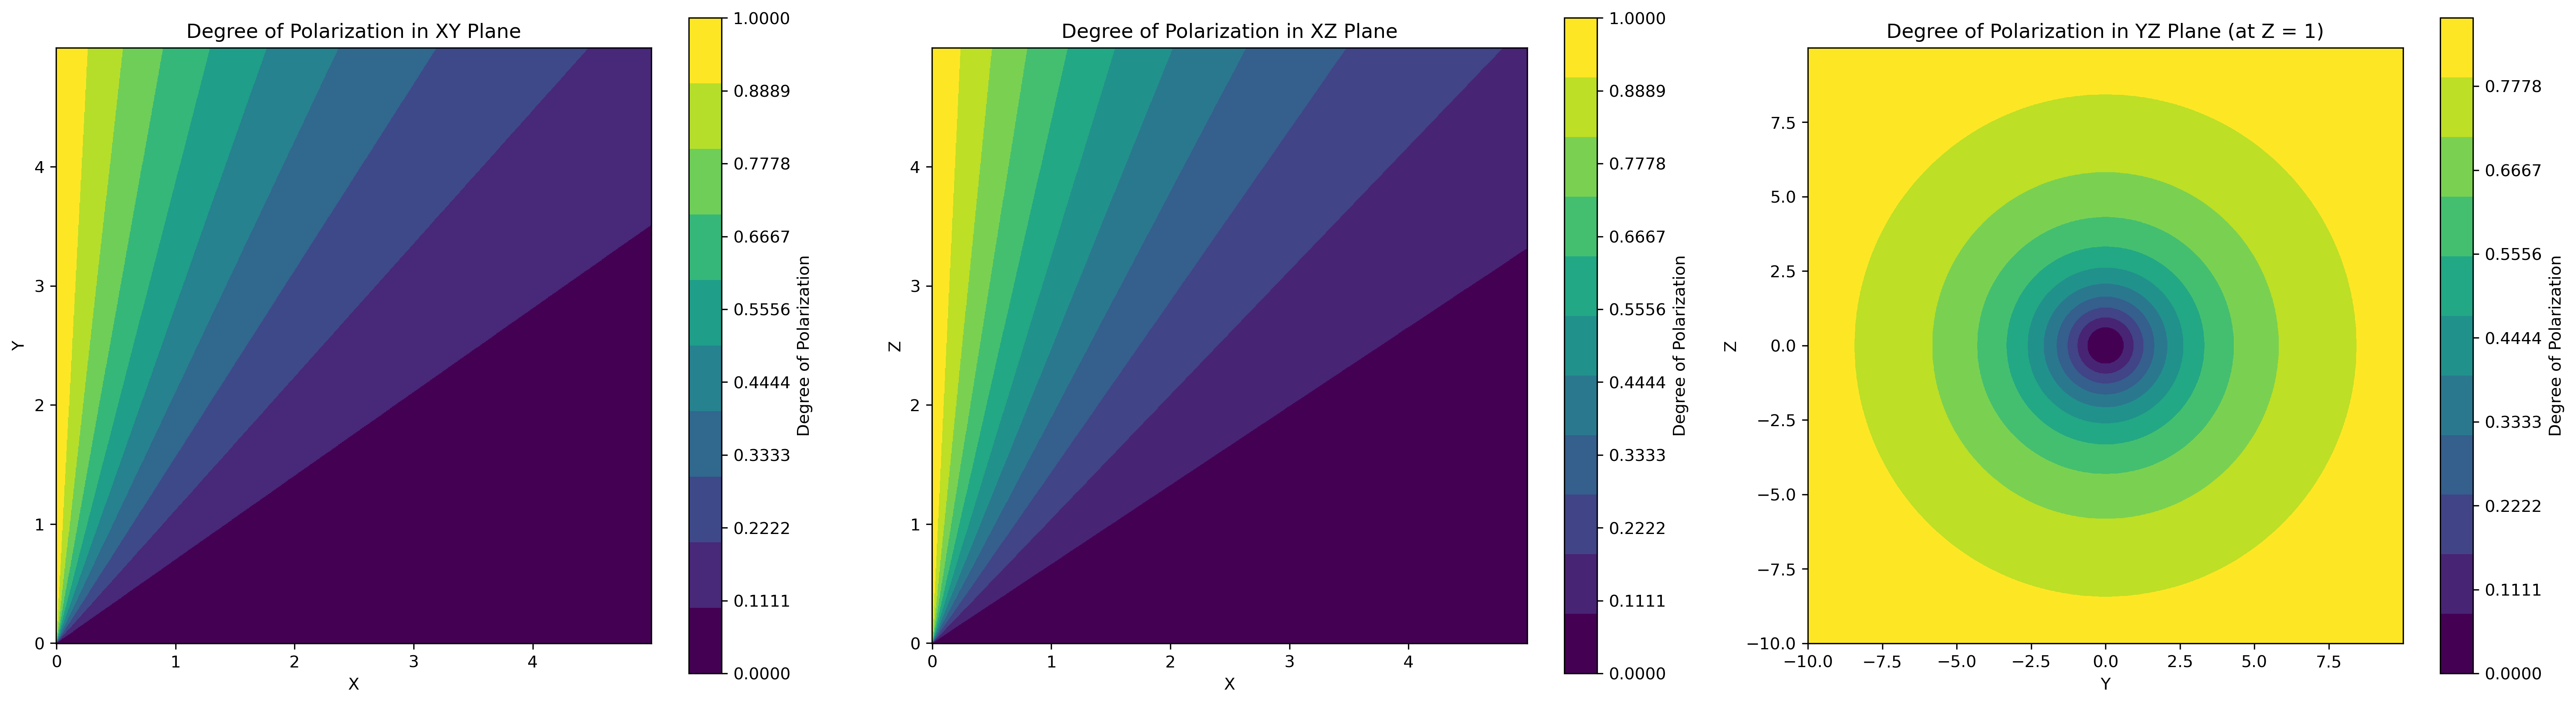

In [3]:
## Make the arrays
x = np.arange(0, 5, 0.005)
y = np.arange(0, 5, 0.005)
z = np.arange(0, 5, 0.005)
yp = np.arange(-10, 10, 0.01)
zp = np.arange(-10, 10, 0.01)

## Form the meshgrids
X1, Y1 = np.meshgrid(x, y)
X2, Z2 = np.meshgrid(x, z)


Y3, Z3 = np.meshgrid(yp, zp) 

## Define the polarization degree function
def degree_pol(theta):
    return (1 - np.cos(theta))/(1 + np.cos(theta))

## Make the plots
plt.figure(dpi = 300, figsize = (22,6))

#### XY plane
theta1 = np.arctan2(Y1, X1)
mag1 = degree_pol(theta1)
mag1 = np.nan_to_num(mag1, nan=0.0, posinf=0.0, neginf=0.0)  ##Handels the X1 = 0 case

# Create a discrete version of the 'viridis' colormap
cmap = plt.get_cmap('viridis', 10)  # 10 discrete levels

plt.subplot(1,3,1)
plt.pcolormesh(X1, Y1, mag1, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization", ticks=np.linspace(np.min(mag1), np.max(mag1), 10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Degree of Polarization in XY Plane")

#### XZ plane
theta2 = np.arctan2(Z2, X2)
mag2 = degree_pol(theta2)
mag2 = np.nan_to_num(mag2, nan=0.0, posinf=0.0, neginf=0.0)  ##Handels the X1 = 0 case

# Create a discrete version of the 'viridis' colormap
cmap = plt.get_cmap('viridis', 11)  # 10 discrete levels

plt.subplot(1,3,2)
plt.pcolormesh(X2, Z2, mag2, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization", ticks=np.linspace(np.min(mag1), np.max(mag1), 10))
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Degree of Polarization in XZ Plane")

#### YZ plane
theta3 = np.arctan2(np.sqrt(Z3**2 + Y3**2), 1)           ##Take the snapshot at the X = 1 plane
mag3 = degree_pol(theta3)
mag3 = np.nan_to_num(mag3, nan=0.0, posinf=0.0, neginf=0.0)  ##Handels the X1 = 0 case

# Create a discrete version of the 'viridis' colormap
cmap = plt.get_cmap('viridis', 11)  # 10 discrete levels

plt.subplot(1,3,3)
plt.pcolormesh(Y3, Z3, mag3, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization", ticks=np.linspace(np.min(mag1), np.max(mag1), 10))
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("Degree of Polarization in YZ Plane (at Z = 1)")

plt.tight_layout()
plt.show()

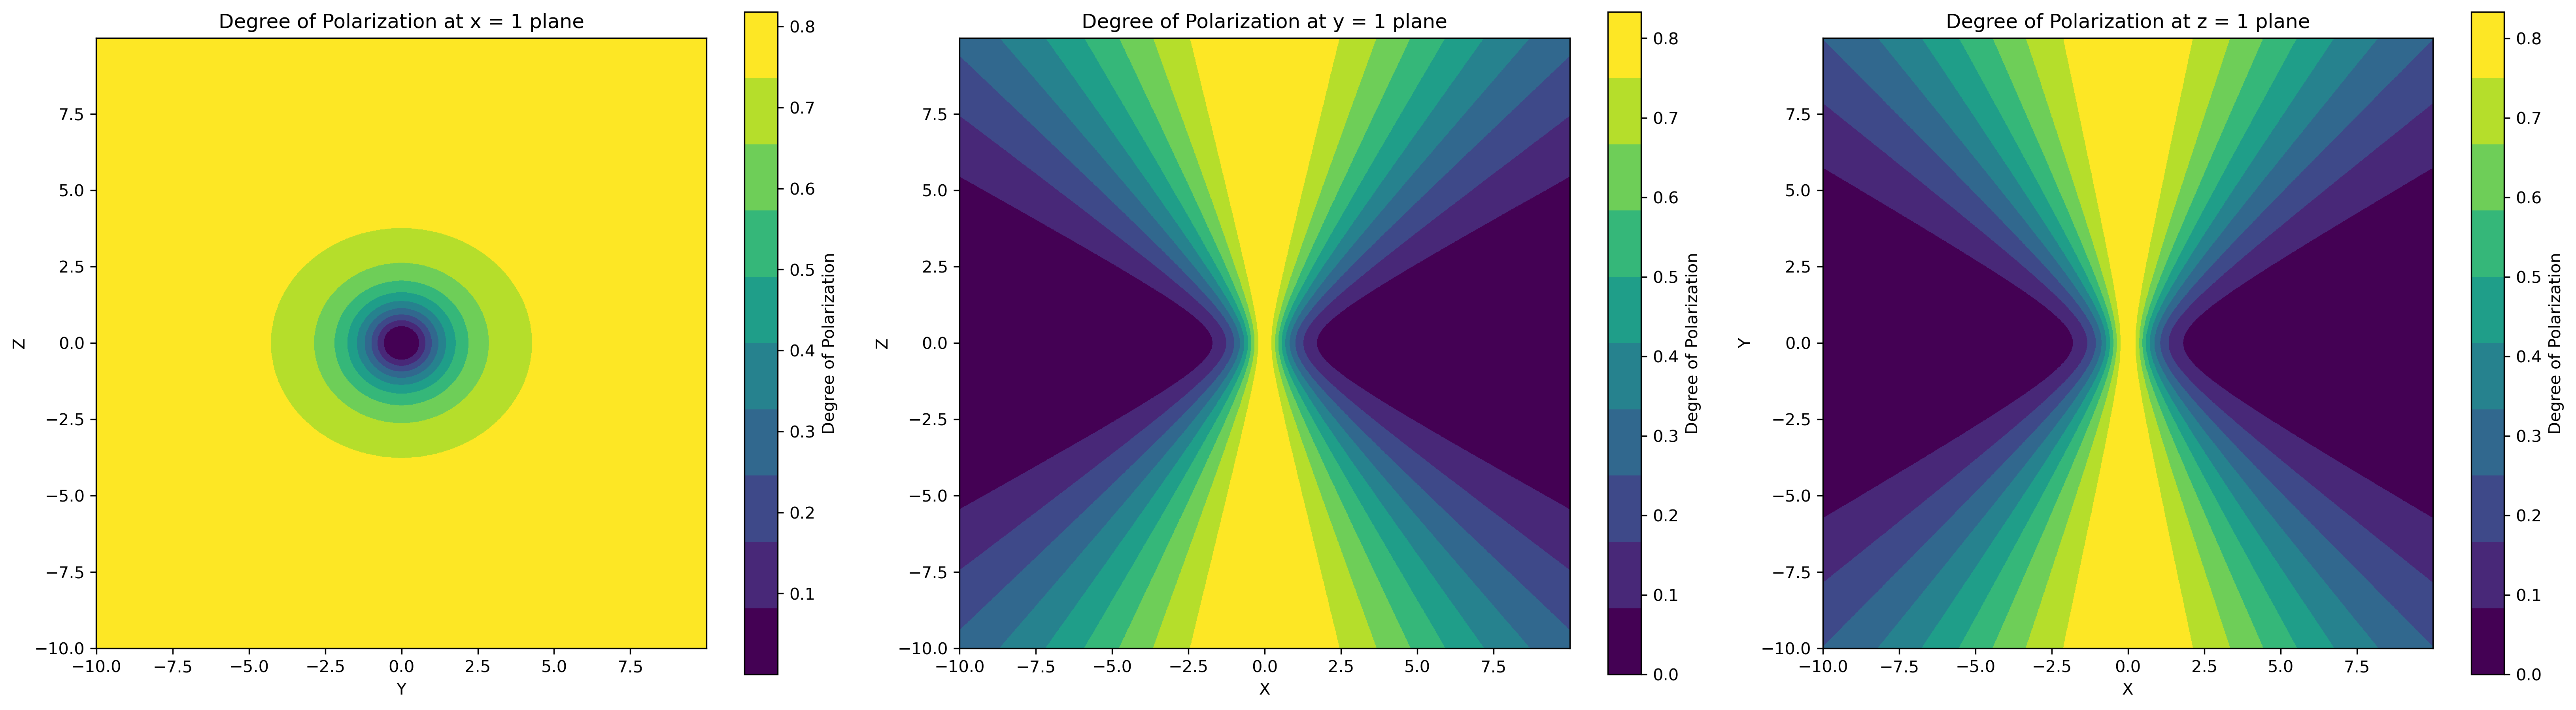

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Coordinate arrays ---
coords = np.arange(-10, 10, 0.01)

# --- Meshgrids for the 3 constant planes ---
Y1, Z1 = np.meshgrid(coords, coords)   # x = 1 plane
X2, Z2 = np.meshgrid(coords, coords)   # y = 1 plane
X3, Y3 = np.meshgrid(coords, coords)   # z = 1 plane

# --- Degree of polarization function ---
def P_net(theta, psi):
    numerator = np.abs(10 * np.sin(theta)**2 - np.sin(psi)**2)
    denominator = 11 + 10 * np.cos(theta)**2 + np.cos(psi)**2
    return numerator / denominator

# --- Set up discrete colormap ---
cmap = plt.get_cmap('viridis', 10)

plt.figure(dpi=300, figsize=(22,6))

# ===============================================================
# Plane x = 1
# ===============================================================
X_const = 1.0
r1 = np.sqrt(X_const**2 + Y1**2 + Z1**2)
theta1 = np.arccos(X_const / r1)      # angle with x-axis
psi1   = np.arccos(Z1 / r1)           # angle with z-axis

P1 = P_net(theta1, psi1)
P1 = np.nan_to_num(P1, nan=0.0, posinf=0.0, neginf=0.0)

plt.subplot(1,3,1)
plt.pcolormesh(Y1, Z1, P1, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("Degree of Polarization at x = 1 plane")

# ===============================================================
# Plane y = 1
# ===============================================================
Y_const = 1.0
r2 = np.sqrt(X2**2 + Y_const**2 + Z2**2)
theta2 = np.arccos(X2 / r2)
psi2   = np.arccos(Z2 / r2)

P2 = P_net(theta2, psi2)
P2 = np.nan_to_num(P2, nan=0.0, posinf=0.0, neginf=0.0)

plt.subplot(1,3,2)
plt.pcolormesh(X2, Z2, P2, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Degree of Polarization at y = 1 plane")

# ===============================================================
# Plane z = 1
# ===============================================================
Z_const = 1.0
r3 = np.sqrt(X3**2 + Y3**2 + Z_const**2)
theta3 = np.arccos(X3 / r3)
psi3   = np.arccos(Z_const / r3)

P3 = P_net(theta3, psi3)
P3 = np.nan_to_num(P3, nan=0.0, posinf=0.0, neginf=0.0)

plt.subplot(1,3,3)
plt.pcolormesh(X3, Y3, P3, shading='auto', cmap=cmap)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label="Degree of Polarization")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Degree of Polarization at z = 1 plane")

# ===============================================================
plt.tight_layout()
plt.show()
